In [106]:
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.figure_factory as ff
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import plotly.figure_factory as ff
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [112]:
data = pd.read_csv("./data/merged_data.csv")
data.head()

,Unnamed: 0,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [ ]:
data= data.drop(columns=['Unnamed: 0'])

In [ ]:
data.count()

In [ ]:
data.head()

In [ ]:
#explore data
print(f'Number of variables - {data.shape[1]}\n')
print(f'Data Types for each variable - \n{data.dtypes}\n')
print(f'Number of variables for each data type - \n{data.dtypes.value_counts()}')

In [ ]:
#search missing data
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]

#Printing null counts for columns that have null count >0
print(f'Null count for Columns - \n{null_count}\n\n')

#Printing % of null counts for columns that have null count>0
for column, null_co in null_count.iteritems():
    print(f'Percentage of missing values for Column {column} - {null_co*100/data.shape[0]:.2f} %')
    if (null_co*100/data.shape[0]) > 0:
      col = column 
      data[data.isnull().any(axis=1)][[col]]

In [ ]:
data = data.dropna()

In [ ]:
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]
print(null_count)

In [ ]:
#Checking boolean False counts for each column, an empty/blank string or integer 0 will result in a False value
#for boolean type
bool_counts = data.astype(bool).sum(axis=0)
for col, val in bool_counts.iteritems():
    print(f'{col} Percentage Boolean False Counts {(data.shape[0]-val)*100/data.shape[0]:.2f}')

In [ ]:
sns.countplot(x = 'genre', data = data)

In [114]:
labels = data.genre.unique()

Partition data

In [ ]:
data.count()

In [ ]:
data_new = data.drop(columns=['genre','title', 'track_id'])

In [ ]:
#classification data splitting 
X_train,X_test, Y_train, Y_test = train_test_split(data_new.iloc[:,:], data['genre'], test_size = 0.2, random_state=1)

In [ ]:
print(X_train.info())

In [ ]:
# Explore test set
print(X_test.info())

**Standardize the data**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# # SelectKBest(f_classif, k=20).fit_transform(X_train, Y_train)
# f_classif(X_train, Y_train)
# np.mean(f_classif(X_train, Y_train)[0])

In [ ]:
# cv_scores_dict = {}
# C_values = [0.01,0.1,1,5,10]
# for kernel in ['linear', 'rbf']:
#     cv_scores = []
#     for c in C_values:    
#         SVM_model = SVC(kernel = kernel, C=c)
#         cv_scores.append(np.mean(cross_val_score(SVM_model, X_train, Y_train, cv=10)))
#     max_cv_score = max(cv_scores)
#     max_C_Value = C_values[cv_scores.index(max_cv_score)]
#     cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score}
# print(cv_scores_dict)

In [ ]:
cv_scores_dict = {'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 5, 'cv_score': 0.5107103384194053}}

In [ ]:
C_values = [0.01,0.1,1,5,10]
kernel = 'poly'
for degree in [2,3,4,5]:
    cv_scores = []
    for c in C_values:    
        SVM_model = SVC(kernel = kernel, C=c, degree= degree)
        cv_scores.append(np.mean(cross_val_score(SVM_model, X_train, Y_train, cv=10,n_jobs=-1)))
    max_cv_score = max(cv_scores)
    max_C_Value = C_values[cv_scores.index(max_cv_score)]
    cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score, 'degree': degree}
print(cv_scores_dict)

In [95]:
print(cv_scores_dict)

{'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 10, 'cv_score': 0.38033646322378717, 'degree': 5}}


In [127]:
svm_model = SVC(kernel = 'rbf', C=5, )
svm_model.fit(X_train, Y_train)
predicted_labels = svm_model.predict(X_test)


0.5325


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

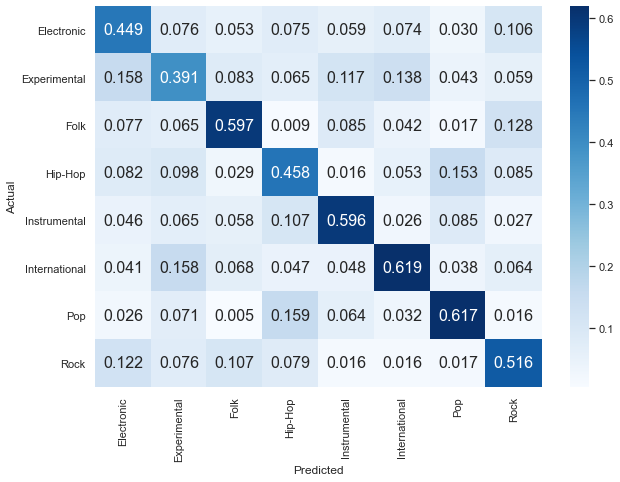

In [128]:
accuracy = accuracy_score(Y_test, predicted_labels)
print(accuracy)
data = confusion_matrix(Y_test, predicted_labels, normalize='pred', labels = labels)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")